<a href="https://colab.research.google.com/github/clumsycoder42525/Netflix_project_data_analysis/blob/main/Netflix_Project_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [170]:
df = pd.read_csv("mymoviedb.csv")


In [171]:
df.head(3)

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,12/15/2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,3/1/2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2/25/2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...


In [172]:
df.isnull().sum()

,0
Release_Date,0
Title,9
Overview,9
Popularity,10
Vote_Count,10
Vote_Average,10
Original_Language,10
Genre,11
Poster_Url,11


In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   object 
 5   Vote_Average       9827 non-null   object 
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: float64(1), object(8)
memory usage: 691.8+ KB


In [174]:
df.size

88533

In [175]:
df.duplicated().sum()


np.int64(0)

In [176]:
df = df.dropna()
df.isnull().sum()

,0
Release_Date,0
Title,0
Overview,0
Popularity,0
Vote_Count,0
Vote_Average,0
Original_Language,0
Genre,0
Poster_Url,0


In [177]:
df.isnull().sum()

,0
Release_Date,0
Title,0
Overview,0
Popularity,0
Vote_Count,0
Vote_Average,0
Original_Language,0
Genre,0
Poster_Url,0


In [178]:
df.duplicated().sum()

np.int64(0)

In [179]:
print(df['Release_Date'].unique()) # Print first 20 unique values

['12/15/2021' '3/1/2022' '2/25/2022' ... '11/6/1974' '10/15/1973'
 '9/23/1984']


In [180]:
df.duplicated().sum()
df.size

88434

Extracting year from Release Date


In [181]:
def date(value):
  return value.split('/')[2]
date("12/15/2021")

'2021'

In [182]:
df["Release_Date"] = df["Release_Date"].map(date)

In [183]:
df.head(5)

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [184]:
df["Release_Date"].unique()

array(['2021', '2022', '2020', '1986', '2018', '1989', '2012', '2009',
       '2005', '2019', '2014', '2016', '2001', '2015', '2002', '2017',
       '2011', '2007', '2004', '2010', '1972', '2023', '2008', '1995',
       '1994', '1992', '2013', '2003', '2006', '1999', '1993', '1985',
       '1998', '1950', '1997', '2000', '1991', '1937', '1990', '1977',
       '1940', '1981', '1942', '1973', '1941', '1974', '1951', '1996',
       '1959', '1961', '1967', '1953', '1988', '1956', '1983', '1976',
       '1955', '1970', '1984', '1971', '1987', '1963', '1980', '1939',
       '1975', '1979', '1982', '1966', '1978', '1965', '1946', '1964',
       '1968', '1962', '1960', '1957', '1949', '1922', '2024', '1969',
       '1954', '1933', '1932', '1958', '1952', '1944', '1931', '1948',
       '1938', '1945', '1927', '1925', '1935', '1936', '1902', '1920',
       '1947', '1943', '1929', '1926', '1921', '1930'], dtype=object)

In [185]:
print("Most Frequent Releases in a single year",df["Release_Date"].mode())

Most Frequent Releases in a single year 0    2021
Name: Release_Date, dtype: object


In [186]:
df["Release_Date"].astype(int)

,Release_Date
0,2021
1,2022
2,2022
3,2021
4,2021
...,...
9832,1973
9833,2020
9834,2016
9835,2021


In [187]:
df.columns

Index(['Release_Date', 'Title', 'Overview', 'Popularity', 'Vote_Count',
       'Vote_Average', 'Original_Language', 'Genre', 'Poster_Url'],
      dtype='object')

In [188]:
cols=["Overview","Original_Language","Poster_Url"]
df.drop(cols,axis=1,inplace=True)


In [189]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7,"Action, Adventure, Thriller, War"


Categorizing Vote_Average column


In [190]:
print(df["Vote_Average"].dtype)
print(df["Vote_Average"].isnull().sum())
df["Vote_Average"] = pd.to_numeric(df["Vote_Average"], errors='coerce')
print(df["Vote_Average"].dtype)


object
0
float64


In [191]:

def labeling(df, col, labels):
    min_val = df[col].min()
    first_q = df[col].describe()["25%"] # Changed variable name for better readability
    second_q = df[col].describe()["50%"]
    third_q = df[col].describe()["75%"]
    max_val = df[col].max() # Max value ko bhi bahar shift kar diya

    edges = [ min_val,
              first_q,
              second_q,
              third_q,
              max_val
            ]
    df[col] = pd.cut(df[col], bins=edges, labels=labels, duplicates='drop')
    return df

In [192]:
labels = ["not popular", "average", "popular", "very popular"]


In [193]:
labeling(df, "Vote_Average", labels)
df["Vote_Average"].unique()

['very popular', 'average', 'popular', 'not popular', NaN]
Categories (4, object): ['not popular' < 'average' < 'popular' < 'very popular']

In [194]:
df["Vote_Average"].value_counts()

,count
Vote_Average,
not popular,2467
very popular,2450
popular,2411
average,2398


In [195]:
df.dropna(inplace=True)
df.isna().sum()

,0
Release_Date,0
Title,0
Popularity,0
Vote_Count,0
Vote_Average,0
Genre,0


Splitting genres

In [196]:

df["Genre"]=df["Genre"].str.split(',')
df=df.explode("Genre").reset_index(drop=True)
df["Genre"] = df["Genre"].str.strip()  # <- Very Important
df = df.reset_index(drop=True)

In [197]:
df["Genre"].unique()
df

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,very popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,very popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,very popular,Science Fiction
3,2022,The Batman,3827.658,1151,very popular,Crime
4,2022,The Batman,3827.658,1151,very popular,Mystery
...,...,...,...,...,...,...
25546,2021,The United States vs. Billie Holiday,13.354,152,popular,Drama
25547,2021,The United States vs. Billie Holiday,13.354,152,popular,History
25548,1984,Threads,13.354,186,very popular,War
25549,1984,Threads,13.354,186,very popular,Drama


**Data Visulaization**


In [198]:
sns.set_style('whitegrid')

In [199]:
df["Genre"].describe()

,Genre
count,25551
unique,19
top,Drama
freq,3715


# Most Frequent Genre


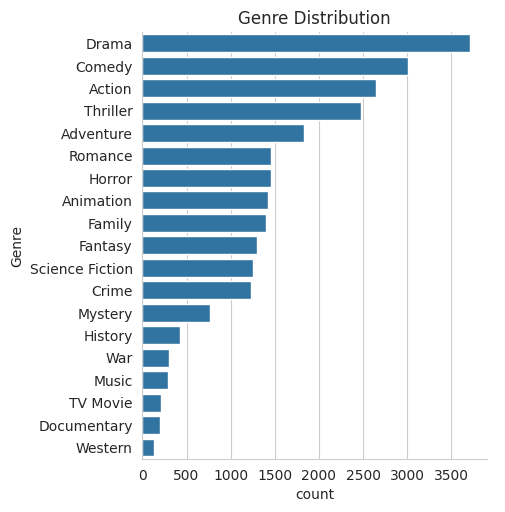

<Figure size 1000x200 with 0 Axes>

<Figure size 1000x200 with 0 Axes>

In [200]:
sns.catplot(y="Genre",data=df,kind="count",order=df["Genre"].value_counts().index)
plt.title("Genre Distribution")
plt.show()
plt.figure(figsize=(10,2)) # Width 14 inches, Height 15 inches


# Highest Votes in vote avg column

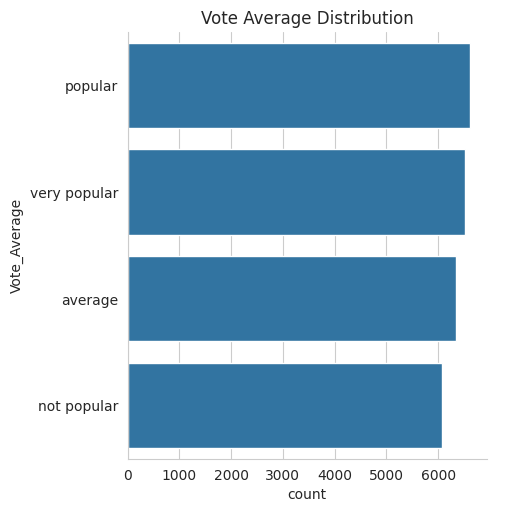

<Figure size 1000x200 with 0 Axes>

<Figure size 1000x200 with 0 Axes>

In [201]:
sns.catplot(y="Vote_Average",data=df,kind="count",order=df["Vote_Average"].value_counts().index)
plt.title("Vote Average Distribution")
plt.show()
plt.figure(figsize=(10,2)) # Width 14 inches, Height 15 inches

# Movie Got Highest Popularity

In [202]:
df[df["Popularity"]==df["Popularity"].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,very popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,very popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,very popular,Science Fiction


# Which year has most filmmed movies

In [207]:
df["Release_Date"] = pd.to_datetime(df["Release_Date"], errors='coerce')
df["Release_Date"]=df["Release_Date"].dt.year

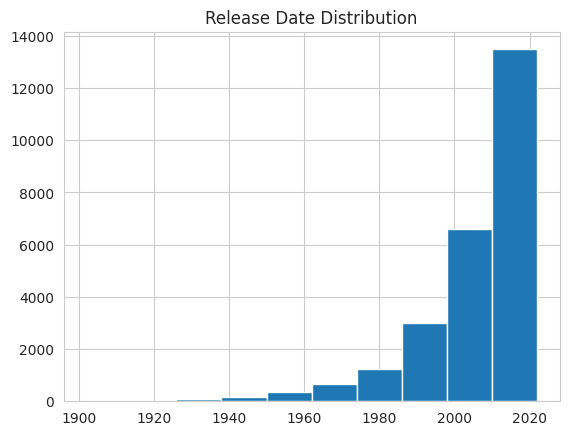

In [208]:
df["Release_Date"].hist()
plt.title("Release Date Distribution")
plt.show()
